In [ ]:
## ba tavajoh b maghaleye wang dar morde protein in shabake zade shode

## part1

In [ ]:
import pandas as pd
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM ,Dropout , Dense, Bidirectional , convolutional
from keras.optimizers import Adam
from keras.layers.core import Reshape
import tensorflow
# from tensorflow.python.keras.layers import Dense , LSTM ,Dropout
# from tensorflow.python.keras import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_df = pd.read_pickle(r"/content/drive/My Drive/pickle_dataframe")
print("len(new_df):", len(new_df),"\n")


len(new_df): 2052 



In [ ]:
def length_of_data(new_df):
  length=[]
  for i in range(len(new_df)):
    length.append(len(new_df['res_number'][i]))
  return(length)

In [ ]:
length1=length_of_data(new_df)

In [ ]:
print("len(new_df) with <50:", len(new_df),"\n")

new_df = new_df[new_df["c4_coord"].map(len)>=50].reset_index(drop = True)
print("len(new_df):", len(new_df),"\n")
# new_df.head()
# new_df = new_df[new_df["c4_coord"].map(len)<=90].reset_index(drop = True)
# print("len(new_df):", len(new_df),"\n")

len(new_df) with <50: 2052 

len(new_df): 734 



In [ ]:
new_df

,pdb_id_chain,res_code,res_number,dihedral,sin_dihedral,cos_dihedral,mean_of_x_pos,mean_of_y_pos,mean_of_z_pos,secondary_structure,p_coord,c5_coord,o5_coord,c4_coord,c3_coord,o3_coord,distance_by_c4,distance_by_mean,7_nearest_nuclt
0,5FLX_z_0,"[[-1, 1, -1, -1], [-1, -1, -1, 1], [-1, -1, 1,...","[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 5...","[[9999.0, 169.22296295196648, 57.0660917772113...","[[9999.0, -0.41053466672835076, 0.494643000463...","[[9999.0, 0.9118449908916767, 0.86909625594181...","[-78.81483205159505, -76.81516774495442, -72.9...","[-48.50666745503744, -50.564666748046875, -53....","[81.61349995930989, 76.48966725667317, 73.1131...",[9999],"[[-79.435, -49.293, 84.352], [-78.858, -50.468...","[[-79.421, -47.917, 82.116], [-77.369, -49.755...","[[-78.777, -48.852, 82.97], [-77.556, -50.594,...","[[-78.501, -47.462, 81.011], [-75.941, -49.8, ...","[[-77.932, -48.566, 80.133], [-75.406, -51.182...","[[-78.823, -48.95, 79.099], [-75.761, -51.589,...",NaN,NaN,NaN
1,5FLX_z_1,"[[-1, -1, 1, -1], [1, -1, -1, -1], [-1, -1, -1...","[224, 225, 226, 227, 228, 229, 230, 231, 232, ...","[[72.25684171766095, 174.84430592493814, 54.94...","[[-0.00021068509414407045, -0.8842486283271339...","[[-0.9999999778058953, 0.46701644864135383, -0...","[-21.214666684468586, -22.792500178019207, -25...","[65.09783426920573, 59.435333887736, 54.262666...","[145.9863306681315, 146.67449951171875, 144.69...",[],"[[-20.061, 66.817, 143.971], [-20.926, 61.619,...","[[-20.742, 65.91, 146.336], [-22.384, 59.915, ...","[[-21.026, 66.01, 144.949], [-22.102, 60.551, ...","[[-21.852, 65.21, 147.079], [-23.763, 59.304, ...","[[-22.235, 63.832, 146.56], [-24.029, 58.254, ...","[[-21.372, 62.808, 147.023], [-23.551, 56.969,...",NaN,NaN,NaN
2,6D9J_4,"[[1, -1, -1, -1], [1, -1, -1, -1], [1, -1, -1,...","[6031, 6032, 6033, 6034, 6035, 6036, 6037, 603...","[[9999.0, -170.41386381061957, 126.92280212360...","[[9999.0, -0.6945976887212898, 0.9518134879812...","[[9999.0, 0.7193983950656564, 0.30667749199616...","[105.04666519165039, 105.81650034586589, 106.8...","[155.67733256022134, 150.70750172932944, 144.7...","[252.07866923014322, 255.80433146158853, 258.0...",[9999],"[[106.561, 157.292, 249.912], [105.453, 153.89...","[[105.199, 156.301, 251.938], [105.939, 151.30...","[[105.348, 156.452, 250.511], [105.016, 152.36...","[[104.13, 155.284, 252.282], [105.631, 150.048...","[[104.556, 154.168, 253.231], [106.205, 148.75...","[[104.486, 154.567, 254.598], [106.655, 147.88...",NaN,NaN,NaN
3,6GZ4_Bw,"[[-1, 1, -1, -1], [-1, -1, 1, -1], [-1, -1, 1,...","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[[9999.0, 179.02521853832772, 52.8037271686045...","[[9999.0, 0.04554695352216948, 0.5674024798942...","[[9999.0, -0.9989621989969637, -0.823440602478...","[148.56733194986978, 150.02950286865234, 152.9...","[189.2875010172526, 186.70516713460287, 182.24...","[172.49516805013022, 167.53200022379556, 165.1...",[9999],"[[147.91, 188.352, 175.118], [148.253, 187.285...","[[148.036, 189.963, 173.046], [149.517, 187.56...","[[148.64, 188.946, 173.832], [149.436, 186.936...","[[148.927, 190.376, 171.901], [150.863, 187.34...","[[149.424, 189.245, 171.018], [151.338, 185.90...","[[148.467, 188.843, 170.056], [150.77, 185.192...",NaN,NaN,NaN
4,6ZMI_L5_0,"[[-1, -1, 1, -1], [-1, 1, -1, -1], [-1, -1, 1,...","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[[9999.0, -145.19073303699454, 150.70224238054...","[[9999.0, -0.6268245119575182, -0.094065715280...","[[9999.0, 0.7791604656354294, 0.99556599038372...","[156.9134953816732, 152.0554987589518, 150.321...","[255.98050181070963, 258.78916422526044, 262.4...","[288.8191630045573, 286.55299377441406, 282.07...",[9999],"[[159.775, 254.908, 288.58], [153.694, 256.447...","[[157.218, 255.439, 288.718], [152.017, 258.32...","[[158.443, 255.219, 289.394], [152.95, 257.829...","[[156.368, 256.463, 289.425], [151.798, 259.80...","[[155.443, 257.269, 288.53], [151.597, 260.275...","[[154.234, 256.585, 288.268], [150.277, 260.05.

In [ ]:
length2 = length_of_data(new_df)

(array([626.,  63.,  19.,  10.,  13.,   0.,   1.,   0.,   0.,   2.]),
 array([  50. ,  356.8,  663.6,  970.4, 1277.2, 1584. , 1890.8, 2197.6,
        2504.4, 2811.2, 3118. ]),
 <a list of 10 Patch objects>)

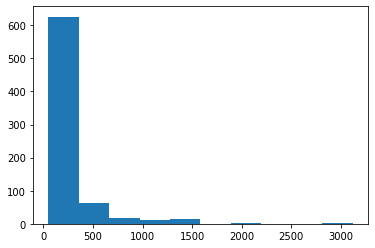

In [ ]:
##plot legth of data befor and after of deletign res with legth<50
# plt.hist(length1)
plt.hist(length2)

In [ ]:
##check res_number and convert from string to integer
l=[]
for i in range(len(new_df)):
  new_df['res_number'][i] = new_df['res_number'][i].astype(np.int)
  for j in range(len(new_df['res_number'][i])-1):
    if new_df['res_number'][i][j+1] != new_df['res_number'][i][j]+1:
      print(len(new_df['res_number'][i]))
      l.append(i)
      break
print(l)
new_df = new_df.drop(l).reset_index(drop = True) 

NameError: ignored

In [ ]:
len(new_df)

711

## PARt 2

In [ ]:
#@title def rotation 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import math 

def x_y_z_genarator(coord):
    x = []
    y = []
    z = []
    for i in range(len(coord)):
        x.append(coord[i][0])
        y.append(coord[i][1])
        z.append(coord[i][2])
    return x, y, z

def get_rotation_Matrix(theta, axis):
    if axis == 'x':
        return np.array([[1, 0, 0],
                         [0, np.cos(theta), -1*np.sin(theta)],
                         [0, np.sin(theta), np.cos(theta)]],
                         dtype= np.float64)
    elif axis == 'y':
        return np.array([[np.cos(theta), 0, np.sin(theta)],
                         [0, 1, 0],
                         [-1*np.sin(theta), 0, np.cos(theta)]],
                         dtype= np.float64)
    elif axis == 'z':
        return np.array([[np.cos(theta), -1*np.sin(theta), 0],
                         [np.sin(theta), np.cos(theta), 0],
                         [0, 0, 1]],
                         dtype= np.float64)
    else:
        return None
    
def get_Angle_between_Vectors(v1,v2):
    return np.arccos((np.dot(v1,v2)) / (np.linalg.norm(v1)*np.linalg.norm(v2)))

def reflection_matrix(plane):
    if plane == "xz":
        return np.array([[1, 0, 0],
                         [0, -1, 0],
                         [0, 0, 1]            
                        ])
    else:
        return None
    
# for point 1 & 2 & 3 & 4
# [0,0,0],[0,0,z],[x,0,z],y>0
#bayad har 15 taii ro bedim b in tabe ta standardesh kone
# def standard_coordination(coordinates ):
#     coord=[]
#     size = len(coordinates)
#     for i in range(15):
#       for j in range(6):
#         coord.append(coordinates[i][j])
#     for i in range(len(coord)-1, -1, -1):
#         coord[i][0]  = coord[i][0] - coord[44][0]
#         coord[i][1]  = coord[i][1] - coord[44][1] 
#         coord[i][2]  = coord[i][2] - coord[44][2]
#     vec_11 = [0, 0, 1]
#     vec_12 = [0, coord[45][1], coord[45][2]]
# #     print(coordinates[0],coordinates[1],coordinates[2])
#     angle_1 = get_Angle_between_Vectors(vec_11,vec_12)
    
#     if coord[45][1] > 0 :
#         angle_1 = math.radians(360)-angle_1
# #     print("angle_1 :", angle_1)
#     rot_1 = get_rotation_Matrix(angle_1,"x")
#     coordinates_2 =np.dot(coord, rot_1)
#     vec_21 = [0, 0, 1]
#     vec_22 = coordinates_2[45] 
#     angle_2 = get_Angle_between_Vectors(vec_21, vec_22)
    
#     if coordinates_2[45][0] < 0 :
#         angle_2 = math.radians(360)-angle_2
# #     print("angle_2 :", angle_2)
#     rot_2 = get_rotation_Matrix(angle_2, "y")
#     coordinates_3 = np.dot(coordinates_2, rot_2)
    
#     vec_31 = [1, 0, 0]
#     vec_32 = [coordinates_3[46][0], coordinates_3[46][1], 0]
#     angle_3 = get_Angle_between_Vectors(vec_31, vec_32)
    
#     if coordinates_3[46][1] < 0 :
#         angle_3 = math.radians(360)-angle_3
# #     print("angle_3 :", angle_3)
#     rot_3 = get_rotation_Matrix(angle_3, "z")
#     coordinates_4 = np.dot(coordinates_3, rot_3)
    
#     if coordinates_4[47][1] < 0:
#         coordinates_5 = np.dot(coordinates_4,reflection_matrix("xz"))
#         return coordinates_5
    
#     else:
#         return coordinates_4
def distance_finder(one,two) :      
  [x1,y1,z1] = one # first coordinates     
  [x2,y2,z2] = two # second coordinates      
  dist = (((x2-x1)**2)+((y2-y1)**2)+((z2-z1)**2))**(1/2)     
  return dist

##baad az inke stanard kardim bayad bedim b in tabe ta mokhtasate har 6 atom to baham begire
def standard_to_6(std):
  coordinates=[]
  for i in range(0,len(std),6):
    coord=[]
    for j in range(i,i+6):
      coord.append(std[j])
    coordinates.append(coord)
  return coordinates
def y_to_label(y):
  y1=[]
  for i in range(len(y)):
    if y[i] == [1,-1,-1,-1]:
      y1.append(0)
    if y[i] == [-1,1,-1,-1]:
      y1.append(1)
    if y[i] == [-1,-1,1,-1]:
      y1.append(2)
    if y[i] == [-1,-1,-1,1]:
      y1.append(3) 
  return y1

In [ ]:
def distance(point1, point2):
    if not (isinstance(point1, (list, np.ndarray)) and isinstance(point2, (list, np.ndarray))):
        print("points must be eighter a list or an numpy ndarray")
        return None
    if isinstance(point1, list):
        point1 = np.array(point1)
    if isinstance(point2, list):
        point2 = np.array(point2)
    return np.sqrt(np.sum((point2 - point1)**2))

In [ ]:
# def get_unit_vector(point1, point2):
#     return ((point2 - point1)/np.linalg.norm(point2 - point1)).tolist()

In [ ]:
## zavaya deg2rad
def multiDimenDist(point1,point2):
   #find the difference between the two points, its really the same as below
   deltaVals = [point2[dimension]-point1[dimension] for dimension in range(len(point1))]
   runningSquared = 0
   #because the pythagarom theorm works for any dimension we can just use that
   for coOrd in deltaVals:
       runningSquared += coOrd**2
   return runningSquared**(1/2)
def unitVec(point1,point2,unitSphere = True):
  #setting unitSphere to True will make the vector scaled down to a sphere with a radius one, instead of it's orginal length
  finalVector = [0 for coOrd in point1]
  for dimension, coOrd in enumerate(point1):
      #finding total differnce for that co-ordinate(x,y,z...)
      deltaCoOrd = point2[dimension]-coOrd
      #adding total difference
      finalVector[dimension] = deltaCoOrd
  if unitSphere:
      totalDist = multiDimenDist(point1,point2)
      unitVector =[]
      for dimen in finalVector:
          unitVector.append( dimen/totalDist)
      return unitVector
  else:
      return finalVector

In [ ]:
unitVec([1,0,0],[0,0,0])

[-1.0, 0.0, 0.0]

In [ ]:
def vect_dist_data(coordinates):
  vec=[]
  for i in range(len(coordinates)):
    v=[]
    for j in range(len(coordinates[i])):
      if i == 0 and j == 2:
        v.append([0,0,0])
      else:
        v.append(unitVec(coordinates[0][2],coordinates[i][j]))
    ##distANCE o5-o5
    v.append(distance_finder(coordinates[0][2], coordinates[i][2]))
    vec.append(v)
  return vec
##15*7 -> vectors, dist

In [ ]:
from sklearn.preprocessing import normalize
#bayad har 15 taii ro bedim b in tabe ta standardesh kone
def standard_coordination_plus_dihed(coords ):
    l=[]
    # vect_dist=[]
    coord=[]
    dihed=[]
    target=[]
    coordinates=coords
    size = len(coordinates)
    for i in range(15):
      for j in range(6):
        coord.append(coordinates[i][j])
      for j in range(6,8):
        dihed.append(coordinates[i][j])
    for i in range(len(coord)-1, -1, -1):
        coord[i][0]  = coord[i][0] - coord[2][0]
        coord[i][1]  = coord[i][1] - coord[2][1] 
        coord[i][2]  = coord[i][2] - coord[2][2]
    vec_11 = [0, 0, 1]
    vec_12 = [0, coord[3][1], coord[3][2]]
#     print(coordinates[0],coordinates[1],coordinates[2])
    angle_1 = get_Angle_between_Vectors(vec_11,vec_12)
    
    if coord[3][1] > 0 :
        angle_1 = math.radians(360)-angle_1
#     print("angle_1 :", angle_1)
    rot_1 = get_rotation_Matrix(angle_1,"x")
    coordinates_2 =np.dot(coord, rot_1)
    vec_21 = [0, 0, 1]
    vec_22 = coordinates_2[45] 
    angle_2 = get_Angle_between_Vectors(vec_21, vec_22)
    
    if coordinates_2[3][0] < 0 :
        angle_2 = math.radians(360)-angle_2
#     print("angle_2 :", angle_2)
    rot_2 = get_rotation_Matrix(angle_2, "y")
    coordinates_3 = np.dot(coordinates_2, rot_2)
    
    vec_31 = [1, 0, 0]
    vec_32 = [coordinates_3[4][0], coordinates_3[4][1], 0]
    angle_3 = get_Angle_between_Vectors(vec_31, vec_32)
    
    if coordinates_3[4][1] < 0 :
        angle_3 = math.radians(360)-angle_3
#     print("angle_3 :", angle_3)
    rot_3 = get_rotation_Matrix(angle_3, "z")
    coordinates_4 = np.dot(coordinates_3, rot_3)
    if coordinates_4[5][1] < 0:
        coordinates_5 = np.dot(coordinates_4,reflection_matrix("xz"))
        # coordinates_5 = normalize( coordinates_5)
        l.append(standard_to_6(coordinates_5))
        vect_dist = list(vect_dist_data(l[0]))

        k=0
        target=[]
        for i in range(0,len(dihed),2):
          k=int(i/2)
          vect_dist[k].append(dihed[i])
          vect_dist[k].append(dihed[i+1])
        target.append(dihed[14])
        target.append(dihed[15])
        vect_dist_sincos=vect_dist
        
        return vect_dist_sincos , target
        #mituni inja 2 ta return koni!yeki baraye target.yeki baraye neighbor ha!
    
    else:
        # coordinates_4 = normalize( coordinates_4)
        l.append(standard_to_6(coordinates_4))

        vect_dist = list(vect_dist_data(l[0]))
        k=0
        target=[]
        for i in range(0,len(dihed),2):
          k=int(i/2)
          vect_dist[k].append(dihed[i])
          vect_dist[k].append(dihed[i+1])
        target.append(dihed[0])
        target.append(dihed[1])
        vect_dist_sincos=vect_dist
        return vect_dist_sincos , target

In [ ]:
# distance_finder(x[0][0][2], x[0][14][2])

In [ ]:
##for test
def main(new_df,nearest):
  x=[]
  y=[]
  for i in range(10):
    for j in range(len(new_df['o5_coord'][i])):
      dist_list=[]
      for k in range(len(new_df['o5_coord'][i])):
        dist_list.append(distance_finder(new_df['o5_coord'][i][j],new_df['o5_coord'][i][k]))
      dist_list = np.array(dist_list)
      print(dist_list)
      indx = dist_list.argsort()[:nearest]

      l=[]
      for n in indx:
        co=[]
        # print(dist_list[n])
        # print(new_df['o5_coord'][i][n])
        # print(new_df['o5_coord'][i][j])
        co.append((new_df['p_coord'][i][n]))
        co.append(new_df['c5_coord'][i][n])
        co.append(new_df['o5_coord'][i][n])
        co.append(new_df['c4_coord'][i][n])
        co.append(new_df['c3_coord'][i][n])
        co.append(new_df['o3_coord'][i][n])
        # co.append(new_df['mean_of_x_pos'][i][n])
        # co.append(new_df['mean_of_y_pos'][i][n])
        # co.append(new_df['mean_of_z_pos'][i][n])
        # co.append(new_df['dihedral'][i][n])
        # co.append(new_df['sin_dihedral'][i][n])
        # co.append(new_df['cos_dihedral'][i][n])
        l.append(co)
      x.append(l)
      y.append(new_df['res_code'][i][j])
      # break

    # break
  return x , y

In [ ]:
x , y =main(new_df, 15)

In [ ]:
x = np.array(x)

In [ ]:
x[0].shape

(15, 6, 3)

In [ ]:
x.shape

(2190, 15, 6, 3)

In [ ]:
x[i][j]

array([[-79.435, -49.293, 84.352],
       [-79.421, -47.917, 82.116],
       [-78.777, -48.852, 82.97],
       [-78.501, -47.462, 81.011],
       [-77.932, -48.566, 80.133],
       [-78.823, -48.95, 79.099]], dtype=object)

In [ ]:
dis=[]
for i in range(len(x)):
  for j in range(len(x[0])):
    for k in range(len(x[0])):
      dis.append(distance_finder(x[i][j],x[i][k]))


ValueError: ignored

In [ ]:
dist = []
for i in range(x.shape[0]):
  for j in range(x.shape[1]):
    for k in range(x.shape[2]):
      for l in range(x.shape[2]):
        dist.append(distance_finder(x[i,j,k,:], x[i,j,l,:]))

(array([197100.,      0., 328500., 130880., 179838., 109526., 105772.,
         66716.,  49038.,  15230.]),
 array([0.        , 0.6310473 , 1.26209459, 1.89314189, 2.52418918,
        3.15523648, 3.78628378, 4.41733107, 5.04837837, 5.67942567,
        6.31047296]),
 <a list of 10 Patch objects>)

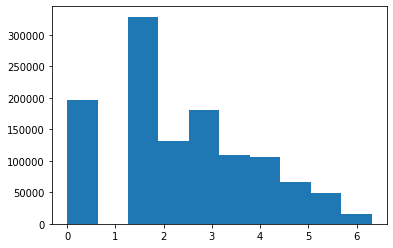

In [ ]:
plt.hist(dist)

In [ ]:
x[0]

array([[[-79.435, -49.293, 84.352],
        [-79.421, -47.917, 82.116],
        [-78.777, -48.852, 82.97],
        [-78.501, -47.462, 81.011],
        [-77.932, -48.566, 80.133],
        [-78.823, -48.95, 79.099]],

       [[-78.858, -50.468, 78.576],
        [-77.369, -49.755, 76.535],
        [-77.556, -50.594, 77.666],
        [-75.941, -49.8, 76.054],
        [-75.406, -51.182, 75.709],
        [-75.761, -51.589, 74.398]],

       [[-75.919, -53.149, 74.043],
        [-73.587, -52.9, 72.859],
        [-74.43, -53.63, 73.746],
        [-72.127, -53.166, 73.132],
        [-71.609, -54.512, 72.629],
        [-70.235, -54.382, 72.27]],

       [[-82.347, -60.012, 81.8],
        [-82.154, -61.601, 83.879],
        [-81.55, -61.036, 82.724],
        [-81.287, -62.676, 84.486],
        [-79.861, -62.27, 84.826],
        [-79.754, -61.587, 86.063]],

       [[-78.571, -60.524, 86.299],
        [-77.078, -62.298, 87.529],
        [-77.259, -61.42, 86.427],
        [-75.829, -63.131, 87.376]

(array([68., 83., 29.,  0.,  0.,  0.,  0.,  0., 18., 72.]),
 array([-84.833, -66.8324, -48.8318, -30.831200000000003,
        -12.830600000000004, 5.1699999999999875, 23.170599999999993,
        41.1712, 59.17179999999999, 77.17239999999998, 95.173],
       dtype=object),
 <a list of 10 Patch objects>)

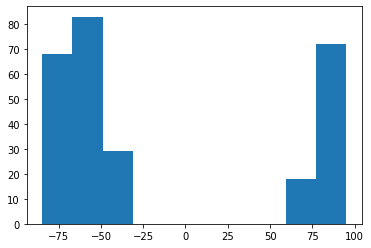

In [ ]:
plt.hist(np.reshape(x, [-1]))

In [ ]:
len(x)

NameError: ignored

In [ ]:
#375*2*15
data=[]
for i in range(len(x)):
  data.append(standard_coordination_plus_dihed(x[i]))



In [ ]:
neighbor_data = []
target_data = []
for i in range(len(data)):
  neighbor_data.append(data[i][0])
  target_data.append(data[i][1])


In [ ]:
len(neighbor_data[300])

15

In [ ]:
##prepare neighbors to train
neighbor_train=[]
for i in range(len(neighbor_data)):
  neighbor=[]
  for j in range(len(neighbor_data[i])):
    neigh=[]
    for k in range(6):
      for q in range(3):
        neigh.append(neighbor_data[i][j][k][q])
    neigh.append(neighbor_data[i][j][6])
    for s in range(7,9):
      for t in range(6):
        neigh.append(neighbor_data[i][j][s][t])
    neighbor.append(neigh)  
  neighbor_train.append(neighbor)

In [ ]:
#prepare target to train
target_train=[]
for i in range(len(target_data)):
  target=[]
  for j in range(len(target_data[i])):
    for k in range(len(target_data[i][j])):
      target.append(target_data[i][j][k])
  target_train.append(target)

In [ ]:
target_train = np.array(target_train)

In [ ]:
neighbor_train = np.array(neighbor_train)

In [ ]:
y = np.array(y)

In [ ]:
y = (y+1)/2

In [ ]:
target_train.shape, neighbor_train.shape, y.shape

((340, 12), (340, 15, 31), (340, 4))

In [ ]:
zero_target_train = target_train
zero_target_train[zero_target_train>9000] = 0

zero_neighbor_train = neighbor_train
zero_neighbor_train[zero_neighbor_train>9000] = 0

In [ ]:
neighbor_unit_vector_train = zero_neighbor_train[:,:,:18]
neighbor_unit_vector_train.shape

(340, 15, 18)

In [ ]:
from sklearn import preprocessing

In [ ]:
neighbor_distance_train = zero_neighbor_train[:,:,18]
neighbor_distance_train1=neighbor_distance_train
neighbor_distance_train = preprocessing.normalize(neighbor_distance_train, norm='l2')
neighbor_distance_train.shape

(340, 15)

In [ ]:
neighbor_distance_train[301]

array([0.        , 0.1189409 , 0.16910087, 0.20664909, 0.20700405,
       0.21504041, 0.23858559, 0.25279378, 0.26322106, 0.27448099,
       0.29093172, 0.31659006, 0.33479229, 0.36258752, 0.36274236])

In [ ]:
neighbor_distance_train1[301]

array([ 0.        ,  5.600145  ,  7.96184815,  9.72974707,  9.74646018,
       10.12483921, 11.23342695, 11.90239745, 12.39334963, 12.92350529,
       13.69806242, 14.90614484, 15.76316824, 17.07186296, 17.07915305])

In [ ]:
neighbor_dihedral_train = zero_neighbor_train[:,:,19:]
neighbor_dihedral_train.shape

(340, 15, 12)

In [ ]:
for i in np.isnan(zero_neighbor_train):
  for j in i:
    for k in j:
      if k == False:
        continue
      for s in k:
        if s == True:
          print(s,k,j,i)
          break

TypeError: ignored

In [ ]:
zero_neighbor_train = np.nan_to_num(zero_neighbor_train)

In [ ]:
zero_neighbor_train.shape

(340, 15, 31)

In [ ]:
zero_neighbor_train[0][0]

array([-8.12786640e-01, -4.41496598e-01,  3.80077139e-01, -8.07607499e-01,
       -4.46613350e-01,  3.85106016e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.07354606e-01, -5.12138256e-01,  6.07317701e-01,
        7.57766712e-01, -7.56170570e-17,  6.52525562e-01,  9.32481100e-01,
        1.97011833e-02,  3.60681108e-01,  0.00000000e+00,  0.00000000e+00,
        4.55469535e-02,  5.67402480e-01, -4.56781577e-01, -5.92814700e-01,
        5.98527256e-01,  0.00000000e+00, -9.98962199e-01, -8.23440602e-01,
        8.89578884e-01,  8.05338892e-01,  8.01102443e-01])

## first model

In [ ]:
y.shape

(711, 4)

In [ ]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(200,input_shape=(15,31)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation= 'softmax'))
model.add(Reshape([-1]))
model.add(Dense(4))

opt = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt ,metrics=['accuracy'])

In [ ]:
model.fit(x=zero_neighbor_train, y=y ,batch_size=batch_size , epochs=20)

Epoch 1/100
6/6 [==============================] - 1s 33ms/step - loss: 7.1925 - accuracy: 0.2379
Epoch 2/100
6/6 [==============================] - 0s 35ms/step - loss: 9.7649 - accuracy: 0.4009
Epoch 3/100
6/6 [==============================] - 0s 36ms/step - loss: 7.4403 - accuracy: 0.3532
Epoch 4/100
6/6 [==============================] - 0s 36ms/step - loss: 7.6375 - accuracy: 0.3879
Epoch 5/100
6/6 [==============================] - 0s 37ms/step - loss: 9.1349 - accuracy: 0.3750
Epoch 6/100
6/6 [==============================] - 0s 36ms/step - loss: 8.8547 - accuracy: 0.3876
Epoch 7/100
6/6 [==============================] - 0s 36ms/step - loss: 9.3089 - accuracy: 0.4105
Epoch 8/100
6/6 [==============================] - 0s 37ms/step - loss: 9.1125 - accuracy: 0.4133
Epoch 9/100
6/6 [==============================] - 0s 35ms/step - loss: 6.8005 - accuracy: 0.4082
Epoch 10/100
6/6 [==============================] - 0s 36ms/step - loss: 7.1357 - accuracy: 0.3921
Epoch 11/100
6/6 [=

## simple model

In [ ]:
from tensorflow.keras.layers import Conv1D, Input, Reshape
from tensorflow.keras.layers import concatenate

In [ ]:
# target_inp = Input(shape=(12,))

neighbor_unit_vec_inp = Input(shape=(15,18))
# reshaped_neighbor_unit_vec_inp = Reshape((15*18,))(neighbor_unit_vec_inp)

neighbor_distance_inp = Input(shape=(15,))

neighbor_dihedral_inp = Input(shape=(15,12))
reshaped_neighbor_dihedral_inp = Reshape((15*12,))(neighbor_dihedral_inp)


unit_conv_layer_1 = Conv1D(filters=128,
                           kernel_size=3,
                           activation='relu',
                           padding='same')(neighbor_unit_vec_inp)

unit_conv_layer_2 = Conv1D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           padding='same')(unit_conv_layer_1)


# print(unit_conv_layer_1)
re_unit = Reshape((15*64,))(unit_conv_layer_2)

layer_0 = concatenate([re_unit,
                         neighbor_distance_inp,
                         reshaped_neighbor_dihedral_inp])

layer_1 = Dense(2048, activation='relu')(layer_0)
layer_2 = Dense(256, activation='relu')(layer_1)
layer_3 = Dense(256, activation='relu')(layer_2)


layer_last = Dense(4, activation='softmax')(layer_3)

output_layer = layer_last

In [ ]:
epoch = 100
batch_size = 64
lr = 0.001

In [ ]:
model = Model([neighbor_unit_vec_inp, neighbor_distance_inp, neighbor_dihedral_inp],
              output_layer)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=['accuracy'])

In [ ]:
neighbor_dihedral_train=np.nan_to_num(neighbor_dihedral_train)

In [ ]:
model.fit(x=(neighbor_unit_vector_train,
             neighbor_distance_train,
             neighbor_dihedral_train),
          y=y,
          batch_size=batch_size , epochs=epoch)

Epoch 1/100
6/6 [==============================] - 1s 57ms/step - loss: 1.3824 - accuracy: 0.2995
Epoch 2/100
6/6 [==============================] - 0s 56ms/step - loss: 1.0250 - accuracy: 0.5076
Epoch 3/100
6/6 [==============================] - 0s 57ms/step - loss: 0.6115 - accuracy: 0.9133
Epoch 4/100
6/6 [==============================] - 0s 55ms/step - loss: 0.3070 - accuracy: 0.9119
Epoch 5/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0708 - accuracy: 1.0000
Epoch 6/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0245 - accuracy: 1.0000
Epoch 7/100
6/6 [==============================] - 0s 55ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 8/100
6/6 [==============================] - 0s 57ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/100
6/6 [==============================] - 0s 56ms/step - loss: 8.2012e-04 - accuracy: 1.0000
Epoch 10/100
6/6 [==============================] - 0s 55ms/step - loss: 6.7286e-04 - accuracy: 1.0000
Epoch 11/10

## model of wang

In [ ]:
!pip install Bio

     |████████████████████████████████| 71kB 4.4MB/s 
     |████████████████████████████████| 2.3MB 9.9MB/s 


In [ ]:
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, Dense, Softmax, Dropout, Input, Lambda
from tensorflow.keras.layers import Multiply, Concatenate, Reshape, LSTM, Flatten
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# from keras.utils.io_utils import HDF5Matrix
from sklearn.preprocessing import OneHotEncoder
from Bio.PDB.Polypeptide import aa3, aa1
import h5py
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

In [ ]:
resProbDense1 = Dense(100,activation='relu', name='res_prob_net_dense_1')
resProbDense2 = Dense(100,activation='relu', name='res_prob_net_dense_2')
resProbDense3 = Dense(100,activation='relu', name='res_prob_net_dense_3')
resProbDense4 = Dense(20,activation='softmax', name='res_prob_net_dense_4')

def residueProbabilityNetwork(inp):
    residueProbability = resProbDense1(inp)
    residueProbability = resProbDense2(residueProbability)
    residueProbability = resProbDense3(residueProbability)
    residueProbability = resProbDense4(residueProbability)
    return residueProbability

In [ ]:
weightDense1 = Dense(100 ,activation='relu', name='weight_net_dense_1')
weightDense2 = Dense(100 ,activation='relu', name='weight_net_dense_2')
weightDense3 = Dense(1, activation='relu', name='weight_net_dense_3')

def weightNetwork(inp):
    weight = weightDense1(inp)
    weight = weightDense2(weight)
    weight = weightDense3(weight)
    return weight

In [ ]:
multiplier = Multiply(name='weight_prob_multiplier')
def computeProbabilities(inp):
    return multiplier([weightNetwork(inp), residueProbabilityNetwork(inp)])

In [ ]:
#12 was 8
target_inp = Input(shape=(12,))
##31 was 18
num_neighbors = 15
neighbor_inp = Input(shape=(num_neighbors, 31))
##?khate zir ro nemidounam
sliceing = Lambda(lambda x, i: x[:,i,:], output_shape=(31,), name='tensor_slicing_layer')
probabilities = []
concatenator = Concatenate(axis=-1, name='target_neighbor_concatenation')
for i in range(neighbor_inp.shape[1]):
    sliceing.arguments = {'i': i}
    slc = sliceing(neighbor_inp)
    conct = concatenator([target_inp, slc])
    p = computeProbabilities(conct)
    probabilities.append(p)
c = Concatenate(axis=-1, name='wighted_prob_concatenation')(probabilities)
reshaped = Reshape(target_shape=(300,1), name='res_prob_inp_reshaping')(c)
lstm = LSTM(1024,return_sequences=True, name='lstm_layer')(reshaped)
flat = Flatten(name='flattening_lstm_seq')(lstm)
dense_last_1 = Dense(300, activation='relu', name='pred_dense_1')(flat)
dense_last_2 = Dense(100, activation='relu', name='pred_dense_2')(dense_last_1)
dense_last_3 = Dense(100, activation='relu', name='pred_dense_3')(dense_last_2)
out = Dense(4, activation='softmax', name='out')(dense_last_3)

In [ ]:
model = Model((target_inp, neighbor_inp),out)

In [ ]:
size = 1000
batch_size = 128
lr = 0.001

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=['accuracy'])

In [ ]:
model.fit(x=(target_train, neighbor_train), y=np.array(y) , epochs=10, verbose=1)

Epoch 1/10
  18/4593 [..............................] - ETA: 22:10:22 - loss: nan - accuracy: 0.2472

KeyboardInterrupt: ignored

In [ ]:
X_t = target_data
X_n = neighbor_data
y = y

In [ ]:
print(X_n[0][0][3])

[0.30225701235974306, -0.0015118191408537878, 0.9532252686968843]


In [ ]:
nx = np.zeros([len(X_t)])

(6,)

In [ ]:
len(target_train[0])

379

In [ ]:
target_train[0]

[-0.6907813204737685,
 -0.0510285356633183,
 0.34673040855948084,
 0.8711523432665248,
 0.41497906498420806,
 0.8482274162515048,
 -0.7230637366681563,
 -0.9986971956244082,
 -0.9379648307800115,
 0.49101282551603775,
 -0.9098309599177379,
 0.5296321839912077]

In [ ]:
size = 1000
batch_size = 128
lr = 0.001

In [ ]:
# ohe = OneHotEncoder(sparse=False)
# aminoAcids = np.reshape(np.array(aa3), (-1,1))
# ohe.fit(aminoAcids)
def generator(batch_size):
    idx = 0
    while True:
        last_batch = idx + batch_size > size
        end = idx + batch_size if not last_batch else size
        yield [X_t[idx:end], X_n[idx:end]],y[idx:end]
        idx = end if not last_batch else 0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=['accuracy'])

In [ ]:
tensorboard = TensorBoard('./logs', batch_size=batch_size, write_graph=True, write_grads=True)

In [ ]:
model.fit(x= , epochs=10, steps_per_epoch=size//batch_size,
                    verbose=1, callbacks=[tensorboard])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: ignored

In [ ]:
??model.fit